In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
ecom = pd.read_csv('Ecommerce Customers')

In [5]:
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
ecom.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 35.2+ KB


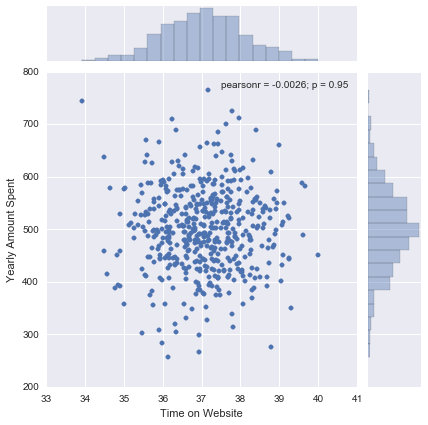

In [9]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=ecom)

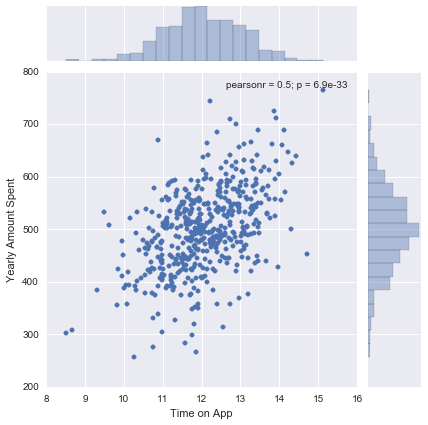

In [10]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=ecom)

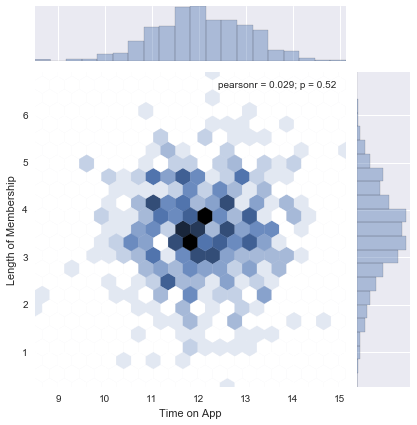

In [11]:
sns.jointplot(x='Time on App',y='Length of Membership',data=ecom,kind='hex')

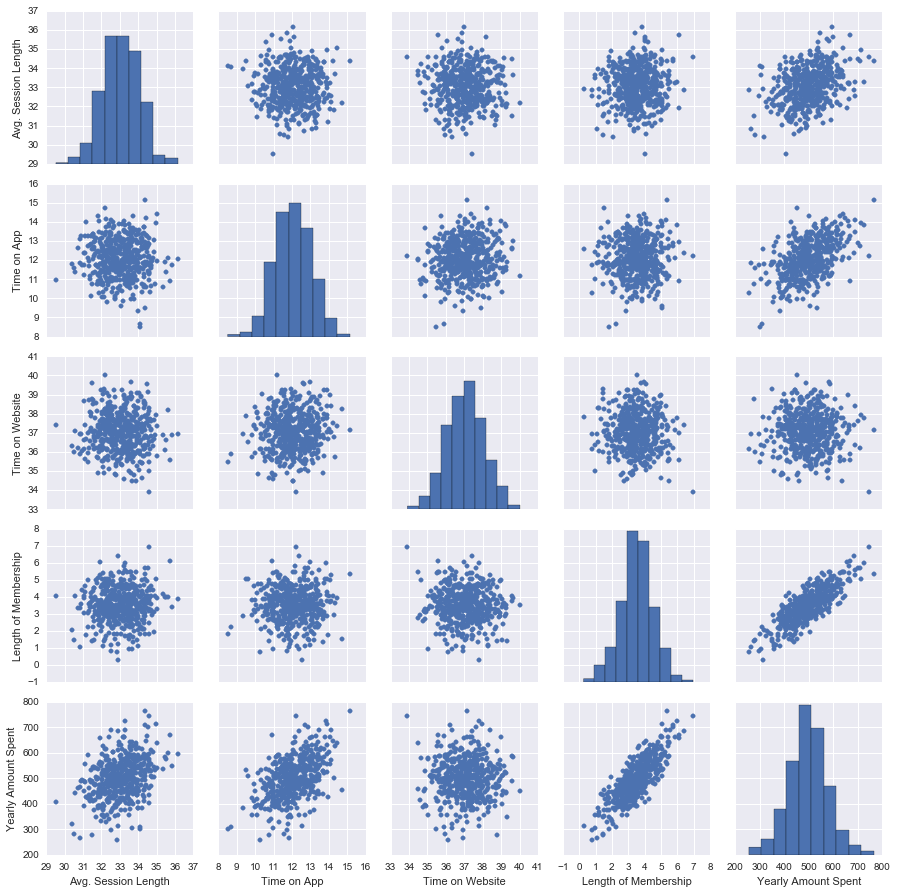

In [13]:
# Just the Grid

g = sns.PairGrid(ecom)
g.map_upper(plt.scatter)
g.map_diag(plt.hist)
g.map_lower(plt.scatter)

In [14]:
#length of membership and yearly amount spent appear to be most correlated and that makes perfect sense

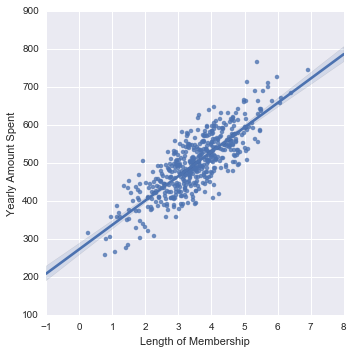

In [15]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=ecom)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression

In [20]:
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [21]:
ecom.columns

Index([u'Email', u'Address', u'Avatar', u'Avg. Session Length', u'Time on App',
       u'Time on Website', u'Length of Membership', u'Yearly Amount Spent'],
      dtype='object')

In [23]:
x = ecom[['Avg. Session Length', 'Time on App',
    'Time on Website', 'Length of Membership']]

In [24]:
y = ecom['Yearly Amount Spent']

In [25]:
from sklearn.cross_validation import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [27]:
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()

In [31]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
pd.DataFrame(lm.coef_,x.columns,columns=['Coeff'])

,Coeff
Avg. Session Length,25.691540
Time on App,37.892600
Time on Website,0.560581
Length of Membership,61.648594


In [34]:
predictions = lm.predict(X_test)

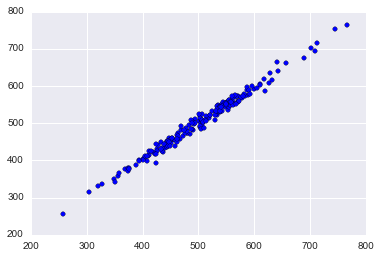

In [35]:
plt.scatter(y_test,predictions)

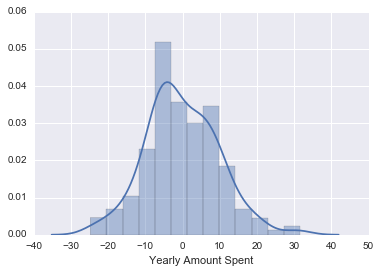

In [36]:
sns.distplot((y_test-predictions))



In [37]:
#fairly normalized residuals

In [ ]:
metrics.mean_absolute_error(y_test, predictions)
metrics.mean_squared_error(y_test,predictions)
